# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Andy
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package reuters to C:\Users\Andy
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Andy
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Andy
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Andy
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('.env')
news_api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q='bitcoin', 
    language='en', 
    page_size=100, 
    sort_by='relevancy'
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q='ethereum', 
    language='en', 
    page_size=100, 
    sort_by='relevancy'
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']

btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)

eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.099995,0.054630,0.027820,0.917570
std,0.337583,0.065971,0.046005,0.083856
min,-0.680800,0.000000,0.000000,0.662000
25%,0.000000,0.000000,0.000000,0.859250
50%,0.000000,0.041000,0.000000,0.931000
75%,0.307625,0.094750,0.058500,1.000000
max,0.817600,0.269000,0.219000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.116632,0.051860,0.023230,0.924920
std,0.346204,0.064362,0.045068,0.075909
min,-0.918600,0.000000,0.000000,0.694000
25%,0.000000,0.000000,0.000000,0.874250
50%,0.000000,0.034000,0.000000,0.934000
75%,0.350450,0.083250,0.040500,1.000000
max,0.827100,0.256000,0.289000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean postive score of 0.054630

Q: Which coin had the highest compound score?

A: Ethereum has the highest compund score with a max of .8271 

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score with max of .269

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942,"[shares, square, today, american, fintech, com..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000,"[teslas, relationship, bitcoin, dalliance, acc..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,"[crypto, industry, whole, ha, seen, momentous,..."
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000,"[cryptocurrency, price, continued, tumble, fri..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835,"[investor, call, disruptive, innovator, detrac..."
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966,"[venmo, jumping, aboard, cryptocurrency, bandw..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000,"[new, york, cnn, businessbitcoin, price, conti..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909,"[creator, behind, cryptopunks, one, popular, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_n_gram = tokenizer(btc_df.text.str.cat())
btc_counter = Counter(ngrams(btc_n_gram, N))
print(dict(btc_counter))


o', 'exchang'): 1, ('exchang', 'charsapril'): 1, ('min', 'readelectric'): 1, ('readelectric', 'vehicle'): 1, ('vehicle', 'manufacturer'): 1, ('manufacturer', 'tesla'): 1, ('tesla', 'earned'): 1, ('earned', 'trading'): 1, ('trading', 'bitcoin'): 1, ('bitcoin', 'didfrom'): 1, ('didfrom', 'selling'): 1, ('selling', 'vehicle'): 1, ('vehicle', 'first'): 1, ('quarter', 'according'): 1, ('according', 'thewall'): 1, ('thewall', 'street'): 1, ('street', 'jour'): 1, ('jour', 'charsbitcoin'): 1, ('charsbitcoin', 'hit'): 1, ('high', 'shy'): 1, ('shy', 'last'): 1, ('last', 'week'): 1, ('week', 'latest'): 1, ('latest', 'landmark'): 1, ('landmark', 'emerging'): 1, ('emerging', 'asset'): 1, ('asset', 'march'): 1, ('march', 'wider'): 1, ('wider', 'acceptance'): 1, ('acceptance', 'gain'): 1, ('gain', 'fuelled'): 1, ('fuelled', 'growing'): 1, ('growing', 'acceptance'): 1, ('acceptance', 'among'): 1, ('among', 'major'): 1, ('major', 'us'): 1, ('us', 'comp'): 1, ('comp', 'charsa'): 1, ('charsa', 'tesla'): 

In [19]:
# Generate the Ethereum N-grams where N=2
eth_n_gram = tokenizer(eth_df.text.str.cat())
eth_counter = Counter(ngrams(eth_n_gram, N))
print(dict(eth_counter))

e'): 1, ('puzzle', 'piece'): 1, ('piece', 'desperate'): 1, ('desperate', 'bid'): 1, ('bid', 'reclaim'): 1, ('reclaim', 'whats'): 1, ('whats', 'theirsif'): 1, ('theirsif', 'paid'): 1, ('paid', 'attent'): 1, ('attent', 'charsupdates'): 1, ('charsupdates', 'sourcing'): 1, ('sourcing', 'add'): 1, ('add', 'contextapril'): 1, ('contextapril', 'reuters'): 1, ('reuters', 'european'): 1, ('european', 'investment'): 1, ('investment', 'bank'): 2, ('bank', 'eib'): 1, ('eib', 'ha'): 1, ('million', 'euro'): 1, ('euro', 'million'): 1, ('million', 'twoyear'): 1, ('twoyear', 'digital'): 1, ('digital', 'bond'): 1, ('bond', 'issue'): 1, ('issue', 'spokesperson'): 1, ('spokesperson', 'told'): 1, ('told', 'reuters'): 1, ('reuters', 'charsrepresentation'): 1, ('charsrepresentation', 'virtual'): 1, ('seen', 'motherboard'): 1, ('motherboard', 'picture'): 1, ('picture', 'illustration'): 1, ('taken', 'april'): 1, ('april', 'reutersdado'): 1, ('reutersdado', 'ruvicillustrationfile'): 1, ('ruvicillustrationfile',

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = token_count(btc_counter, 10)
btc_top_10

[(('charsby', 'reuters'), 17),
 (('virtual', 'currency'), 16),
 (('illustration', 'taken'), 14),
 (('currency', 'bitcoin'), 12),
 (('representation', 'virtual'), 11),
 (('seen', 'front'), 11),
 (('front', 'stock'), 11),
 (('stock', 'graph'), 11),
 (('graph', 'illustration'), 11),
 (('bitcoin', 'seen'), 9)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = token_count(eth_counter, 10)
eth_top_10

[(('virtual', 'currency'), 12),
 (('illustration', 'taken'), 12),
 (('representation', 'virtual'), 10),
 (('seen', 'front'), 10),
 (('front', 'stock'), 10),
 (('stock', 'graph'), 10),
 (('graph', 'illustration'), 10),
 (('charsby', 'reuters'), 9),
 (('digital', 'currency'), 9),
 (('charsapril', 'min'), 9)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

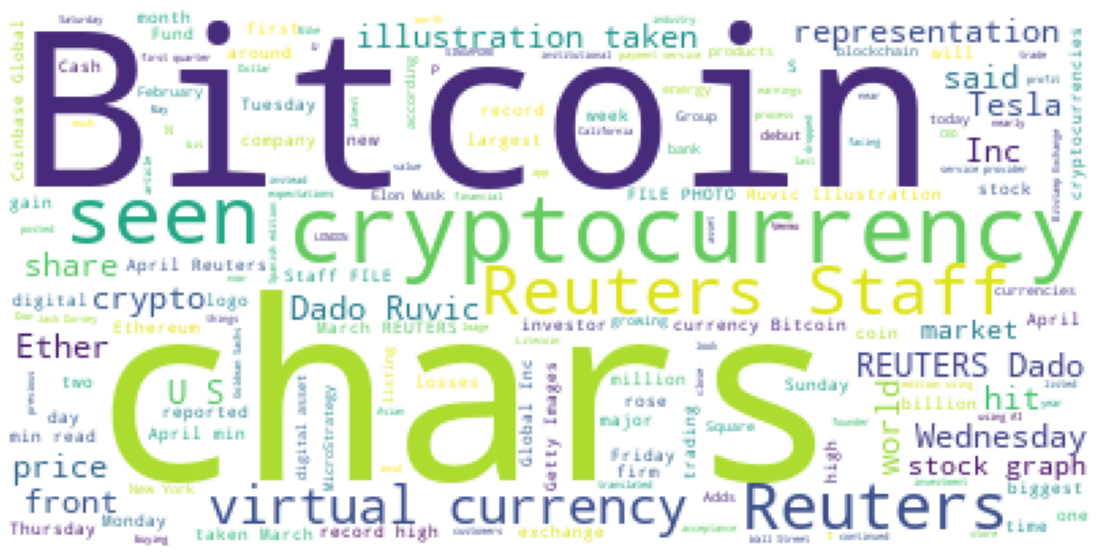

In [33]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud(background_color='white').generate(btc_df.text.str.cat())
btc_wc
plt.axis('off')
plt.imshow(btc_wc)

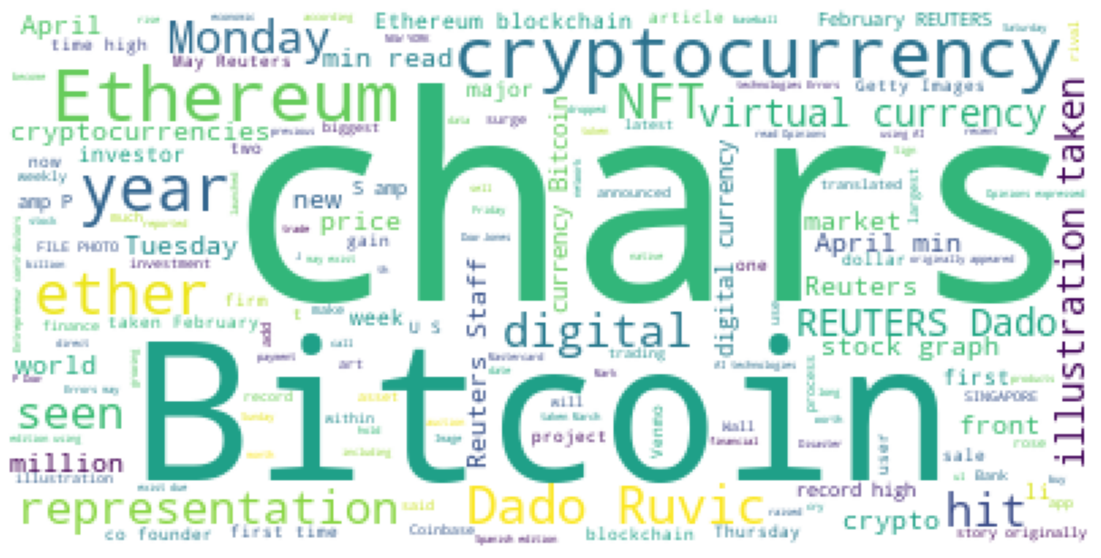

In [34]:
# Generate the Ethereum word cloud
eth_wc = WordCloud(background_color='white').generate(eth_df.text.str.cat())
eth_wc
plt.axis('off')
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
btc_concat = btc_df.text.str.cat()
btc_concat

s from major institutional investors. The startup said Monday that it has closed… [+2610 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars]By Reuters Staff\r\n(Reuters) -MicroStrategy Inc, a major bitcoin corporate backer, said on Monday its non-employee directors will get fees for their services in bitcoin, instead of cash.\r\nShares of th… [+685 chars]The two founders of Crusoe Energy think they may have a solution to two of the largest problems facing the planet today — the increasing energy footprint of the tech industry and the greenhouse gas e… [+7655 chars]We\'re going to the moon.\xa0\r\nThe

In [40]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_concat)
btc_doc
# Add a title to the document
btc_doc.user_data['Title'] = 'BTC NER'

In [41]:
# Render the visualization
displacy.render(btc_doc, style ='ent')

In [42]:
# List all Entities
for i in btc_doc.ents:
    print(i.text, i.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
a momentous year DATE
2020 DATE
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Babel Finance ORG
Monday DATE
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
Reuters ORG
Santa Clarita GPE
California GPE
U.S. GPE
October 2, 2019 DATE
Mike Blake
 PERSON


---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together
eth_concat = eth_df.text.str.cat()
eth_concat

it a record high of… [+760 chars]It took a while to get here, but Dfinity is finally launching.\xa0\r\nIn July 2018, I went to the Swiss city of Zug to speak to Dominic Williams, CEO of crypto platform Dfinity. Its blockchain project has… [+4319 chars]This story originally appeared on StockMarketUS Stock Futures Edge Higher On Monday Morning\r\nThe U.S. stock futures moved higher in pre-market trading on Monday as investors prepare themselves for th… [+6451 chars]Non-fungible tokens (NFTs) are quickly becoming go-tos for digital collecting, and that now includes something you might have had as a kid: baseball cards. Topps is launching its first NFT-based base… [+1535 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nCryptocurrencies are the thing of today. Vitalik Buterin , 27-year-old co-founder of… [+831 chars]By Reuters Staff\r\nSINGAPORE, May 3 (Reuters) - Cryptocurrency ether hit a record high on Monday to tr

In [45]:
# Run the NER processor on all of the text_doc = nlp(btc_concat)
eth_doc = nlp(eth_concat)
eth_doc
# Add a title to the document
eth_doc.user_data['Title'] = 'ETH NER'

In [46]:
# Render the visualization
displacy.render(eth_doc, style ='ent')

In [47]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency P

---